In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plty

In [3]:
df=pd.read_csv(r"C:\Users\USER\Downloads\sales_data_with_discounts.csv")

In [5]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [4]:
df.shape # SHAPE OF DATA

(450, 13)

In [8]:
df.info() #DATA INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [9]:
df.describe() # SUMMARY STATISTICS

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [10]:
df.isnull().sum() #NULL VALUES

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

In [12]:
df.duplicated().sum() #DUPLICATES

np.int64(0)

In [13]:
cat_cols=[i for i in df.columns if  df[i].dtypes=="O"] #CATEGORICAL COLUMNS

In [14]:
num_cols=[i for i in df.columns if  df[i].dtypes!="O"] #NUMERICAL COLUMNS

In [15]:
cat_cols

['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

In [16]:
num_cols

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

In [17]:
df[cat_cols]

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,15-04-2021,Thursday,L07,C,Lifestyle,Viva,W-Western
447,15-04-2021,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,15-04-2021,Thursday,L09,C,Lifestyle,Jeera,M-Formals


In [18]:
df[num_cols]

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [26]:
df["Volume"].mean()

np.float64(5.066666666666666)

In [27]:
df["Volume"].median()

np.float64(4.0)

In [28]:
df["Volume"].mode()

0    3
Name: Volume, dtype: int64

In [29]:
df["Volume"].std()

np.float64(4.231602391213923)

In [20]:
df["Avg Price"].mean()

np.float64(10453.433333333332)

In [30]:
df["Avg Price"].median()

np.float64(1450.0)

In [31]:
df["Avg Price"].mode()

0     400
1     450
2     500
3    1300
4    8100
Name: Avg Price, dtype: int64

In [32]:
df["Avg Price"].std()

np.float64(18079.90483993647)

In [21]:
df["Total Sales Value"].mean()

np.float64(33812.83555555555)

In [33]:
df["Total Sales Value"].median()

np.float64(5700.0)

In [40]:
df["Total Sales Value"].mode()

0    24300
Name: Total Sales Value, dtype: int64

In [41]:
df["Total Sales Value"].std()

np.float64(50535.07417255325)

In [22]:
df["Discount Rate (%)"].mean()

np.float64(15.155241895330914)

In [42]:
df["Discount Rate (%)"].median()

np.float64(16.57776564929597)

In [43]:
df["Discount Rate (%)"].mode()

0       5.007822
1       5.055218
2       5.059801
3       5.072124
4       5.084108
         ...    
445    19.940610
446    19.965340
447    19.976879
448    19.982257
449    19.992407
Name: Discount Rate (%), Length: 450, dtype: float64

In [44]:
df["Discount Rate (%)"].std()

np.float64(4.22060215332551)

In [23]:
df["Discount Amount"].mean()

np.float64(3346.499424342415)

In [36]:
df["Discount Amount"].median()

np.float64(988.9337332382784)

In [37]:
df["Discount Amount"].mode()

0         69.177942
1         73.025199
2         93.649161
3         94.682735
4        102.705757
           ...     
445    17900.983733
446    21153.498820
447    21496.675367
448    25328.224204
449    25738.022194
Name: Discount Amount, Length: 450, dtype: float64

In [48]:
df["Discount Amount"].std()

np.float64(4509.902963353998)

In [38]:
df["Net Sales Value"].mean()

np.float64(30466.336131270138)

In [39]:
df["Net Sales Value"].median()

np.float64(4677.788059301853)

In [49]:
df["Net Sales Value"].mode()

0         326.974801
1         330.822058
2         466.350839
3         485.317265
4         496.607104
           ...      
445    162603.186379
446    163915.971000
447    163967.080070
448    166263.161348
449    179507.479049
Name: Net Sales Value, Length: 450, dtype: float64

In [50]:
df["Net Sales Value"].std()

np.float64(46358.65662406695)

In [53]:
df[num_cols].mean()

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [54]:
df[num_cols].median()

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [55]:
df[num_cols].mode()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,3.0,400.0,24300.0,5.007822,69.177942,326.974801
1,NaN,450.0,NaN,5.055218,73.025199,330.822058
2,NaN,500.0,NaN,5.059801,93.649161,466.350839
3,NaN,1300.0,NaN,5.072124,94.682735,485.317265
4,NaN,8100.0,NaN,5.084108,102.705757,496.607104
...,...,...,...,...,...,...
445,NaN,NaN,NaN,19.940610,17900.983733,162603.186379
446,NaN,NaN,NaN,19.965340,21153.498820,163915.971000
447,NaN,NaN,NaN,19.976879,21496.675367,163967.080070
448,NaN,NaN,NaN,19.982257,25328.224204,166263.161348


In [56]:
df[num_cols].std()

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

1. Volume
Mean: 5.07
Median: 4.0
Std Dev: 4.23
Mode: 3
Interpretation:
Most transactions involve 3–5 units. The mean being slightly higher than the median suggests a few high-volume orders pulling the average up. Variation is moderate.

2. Avg Price
Mean: 10,453.43
Median: 1,450
Std Dev: 18,079.90
Mode: 400, 450, 500, 1300, 8100 (multiple)
Interpretation:
The huge gap between mean (10K) and median (1.45K), along with the very high standard deviation, tells us there are some very high-priced products (e.g., smartphones) that pull the average up.
Most regular-price items fall between 400 and 1500, while premium items inflate the mean.

3. Total Sales Value
Mean: 33,812.84
Median: 5,700
Std Dev: 50,535.07
Mode: 24,300 appears in one row (Mobile case)
Interpretation:
Sales values vary significantly. The mean is much higher than the median due to high-ticket items, meaning a small number of large transactions drive revenue disproportionately.

4. Discount Rate (%)
Mean: 15.16%
Median: 16.58%
Std Dev: 4.22%
Mode Range: ~5.0% to 19.9%
Interpretation:
Most discounts fall in the 15–17% range, but there are smaller discounts around 5%. Variation is reasonable. This tells us discounting is applied consistently, but not uniformly across product categories.

5. Discount Amount
Mean: 3,346.50
Median: 988.93
Std Dev: 4,509.90
Mode: wide range (69 to 25K etc.)
Interpretation:
The median is much lower than the mean, showing a highly skewed distribution — a few transactions have very large discounts, likely tied to high-value products. Most discounts given are below ₹1,000.

6. Net Sales Value
Mean: 30,466.34
Median: 4,677.79
Std Dev: 46,358.66
Mode: Many unique values, not meaningful
Interpretation:
Similar to total sales value: the mean being 6× higher than the median indicates that a small number of expensive items dominate revenue. Standard deviation confirms this is a highly spread-out variables.

Histograms

<Axes: xlabel='Volume', ylabel='Count'>

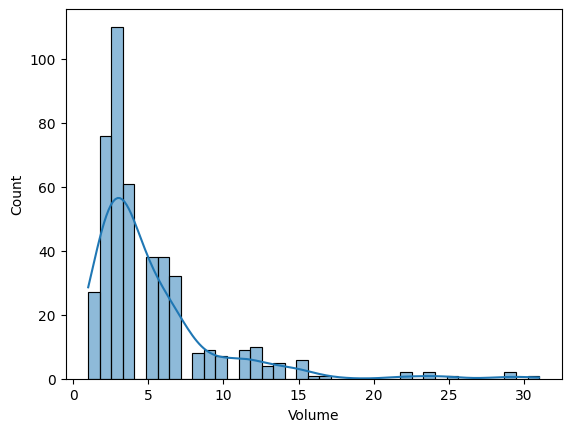

In [58]:
sns.histplot(df["Volume"],kde=True)

The data is right-skewed with most values between 2 and 7.
There are a few high outliers going up to 30+.
The feature is not normally distributed.
A log or similar transformation may help if used in modeling.

<Axes: xlabel='Avg Price', ylabel='Count'>

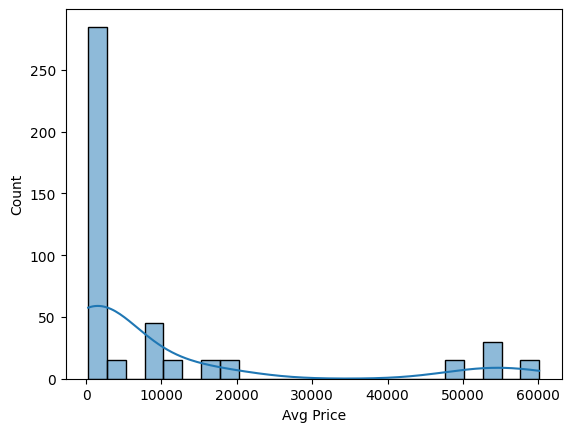

In [59]:
sns.histplot(df["Avg Price"],kde=True)

The data is extremely right-skewed.
Most values are very low (near 0–2000).
A few values shoot up to 50K–60K, acting as extreme outliers.
The distribution is not normal and highly dispersed.
Likely needs log transformation or outlier handling before modeling.

<Axes: xlabel='Total Sales Value', ylabel='Count'>

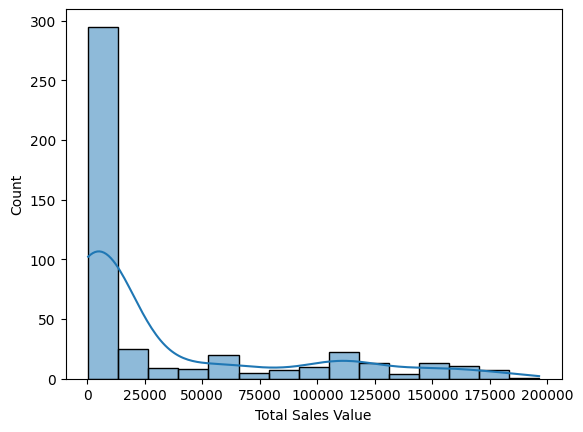

In [60]:
sns.histplot(df["Total Sales Value"],kde=True)

total sales values are highly right-skewed, with most sales concentrated at lower values (close to zero). The distribution suggests that while many transactions have small sales amounts, there are a few transactions with very high sales, creating a long tail on the right side. This pattern indicates the presence of outliers or high-value sales that significantly differ from the majority of the data.

<Axes: xlabel='Discount Rate (%)', ylabel='Count'>

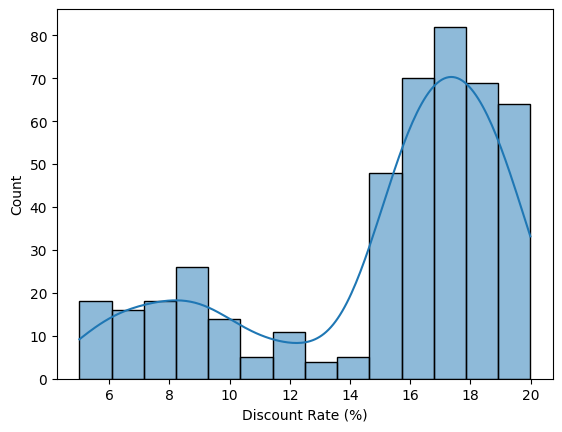

In [61]:
sns.histplot(df["Discount Rate (%)"],kde=True)

data is left skewed and slightly right skewed
A more prominent peak appears near 17%, showing a higher frequency of higher discount rates.

<Axes: xlabel='Discount Amount', ylabel='Count'>

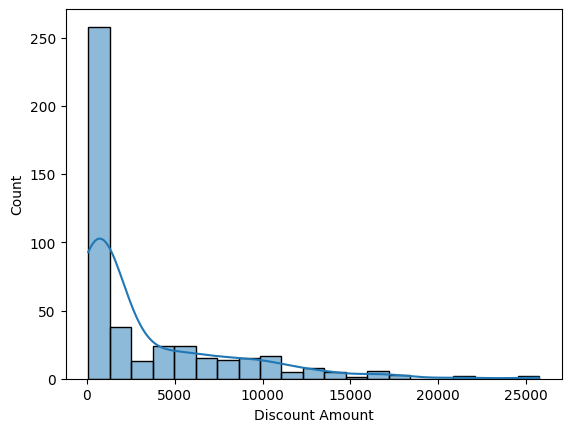

In [62]:
sns.histplot(df["Discount Amount"],kde=True)

data is right skewed with most values between 0 to 1000 

<Axes: xlabel='Net Sales Value', ylabel='Count'>

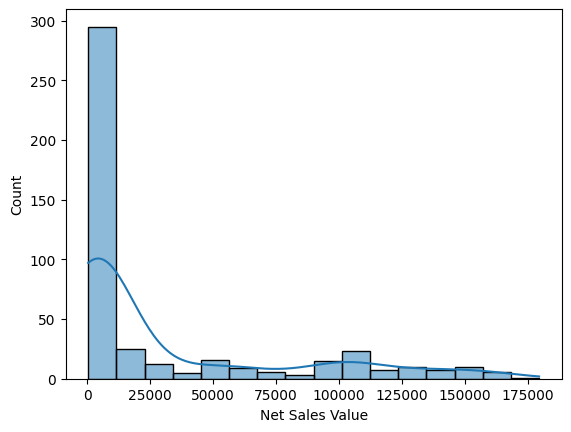

In [64]:
sns.histplot(df["Net Sales Value"],kde=True)

data is right skewed with peak value at 0 and most values between 0 and 50000

<Axes: >

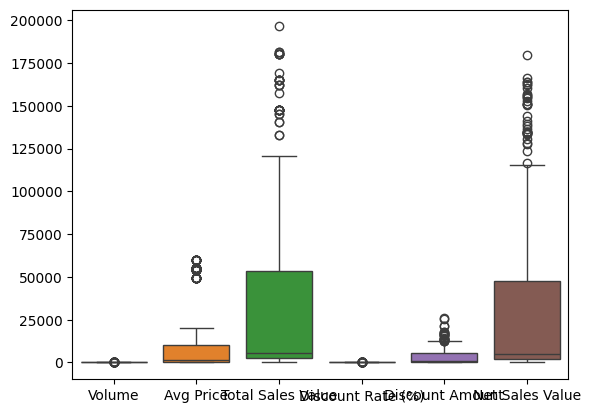

In [71]:
sns.boxplot(df[num_cols])

In [82]:
def outlier_capping(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_extream=q1-1.5*iqr
    upper_extream=q3+1.5*iqr
    df[column]=df[column].apply(lambda x:lower_extream if x<lower_extream else upper_extream if x>upper_extream else x)
for col in df.select_dtypes(["int","float"]).columns:
    outlier_capping(df,col)

In [86]:
dfs=df[num_cols]

In [87]:
dfs

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,10.5,12100.0,128950.0,11.654820,12600.549611,116316.469161
1,10.0,10100.0,101000.0,11.560498,11676.102961,89323.897039
2,7.0,16100.0,112700.0,9.456886,10657.910157,102042.089843
3,6.0,20100.0,120600.0,7.740579,8364.074702,112235.925298
4,3.0,8100.0,24300.0,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2.0,1300.0,2600.0,15.475687,402.367873,2197.632127
446,6.0,2600.0,15600.0,17.057027,2660.896242,12939.103758
447,2.0,1600.0,3200.0,18.965550,606.897606,2593.102394
448,3.0,1900.0,5700.0,16.793014,957.201826,4742.798174


<Axes: >

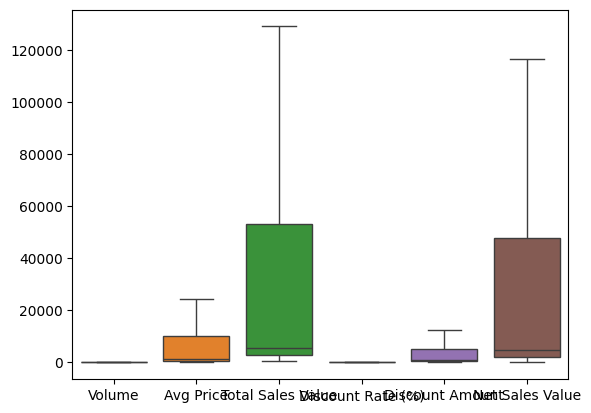

In [83]:
sns.boxplot(df[num_cols])

In [88]:
q1=dfs.quantile(0.25)

In [89]:
q3=dfs.quantile(0.75)

In [90]:
q1

Volume                  3.000000
Avg Price             465.000000
Total Sales Value    2700.000000
Discount Rate (%)      13.965063
Discount Amount       460.459304
Net Sales Value      2202.208645
Name: 0.25, dtype: float64

In [91]:
q3

Volume                   6.000000
Avg Price            10100.000000
Total Sales Value    53200.000000
Discount Rate (%)       18.114718
Discount Amount       5316.495427
Net Sales Value      47847.912852
Name: 0.75, dtype: float64

In [92]:
iqr=q3-q1

In [93]:
iqr

Volume                   3.000000
Avg Price             9635.000000
Total Sales Value    50500.000000
Discount Rate (%)        4.149656
Discount Amount       4856.036123
Net Sales Value      45645.704206
dtype: float64

In [100]:
lower_extreams=q1-1.5*iqr

In [101]:
lower_extreams

Volume                  -1.500000
Avg Price           -13987.500000
Total Sales Value   -73050.000000
Discount Rate (%)        7.740579
Discount Amount      -6823.594880
Net Sales Value     -66266.347664
dtype: float64

In [102]:
upper_extreams=q3+1.5*iqr

In [103]:
upper_extreams

Volume                   10.500000
Avg Price             24552.500000
Total Sales Value    128950.000000
Discount Rate (%)        24.339202
Discount Amount       12600.549611
Net Sales Value      116316.469161
dtype: float64

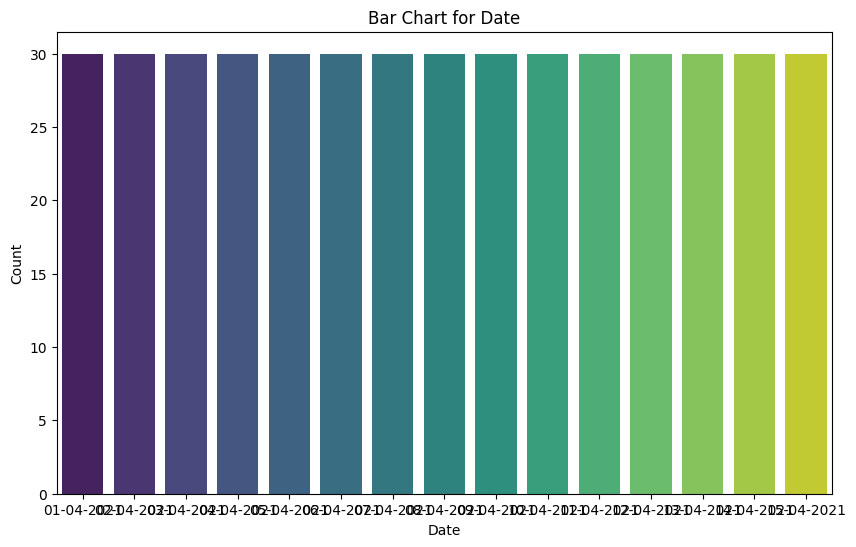

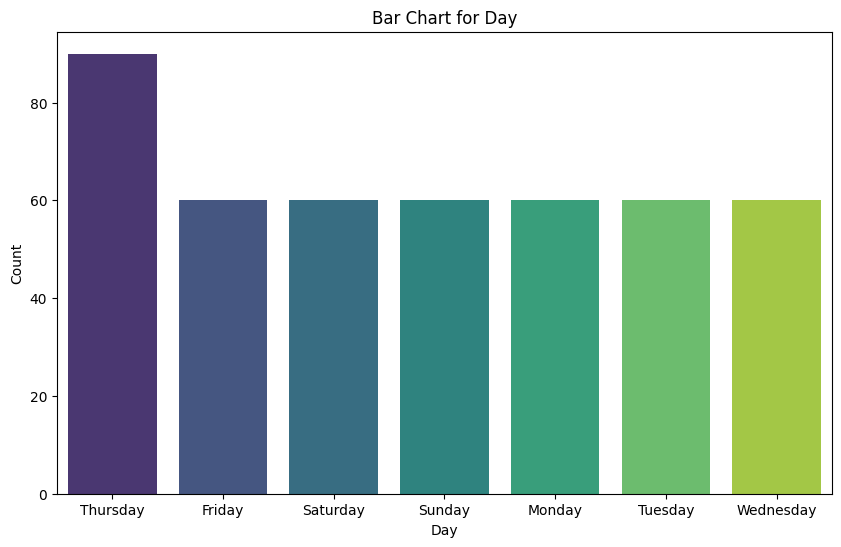

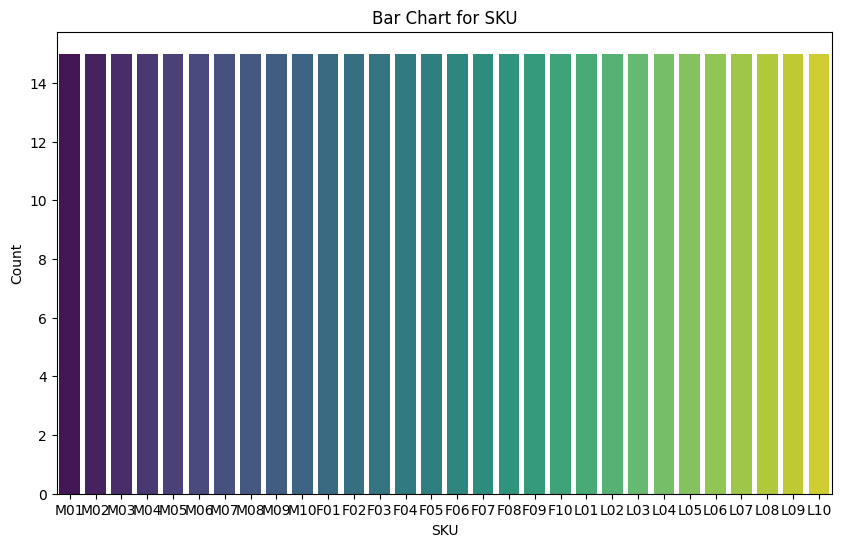

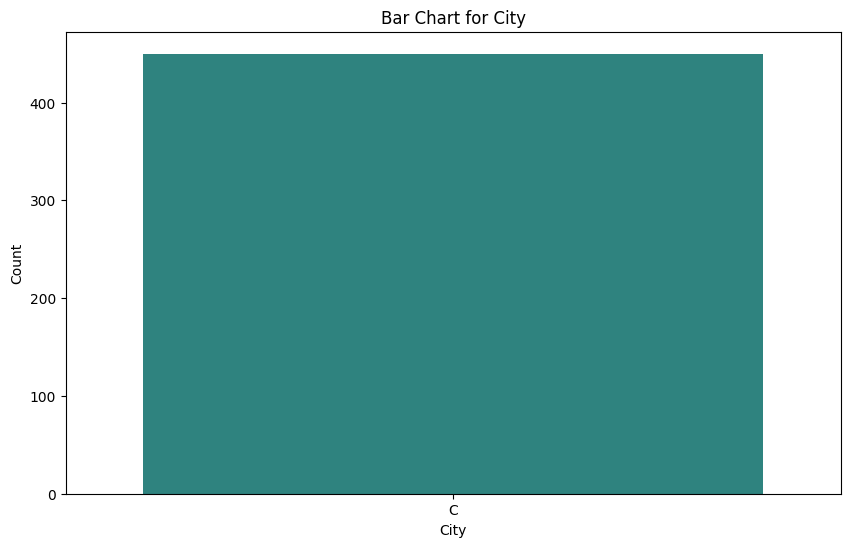

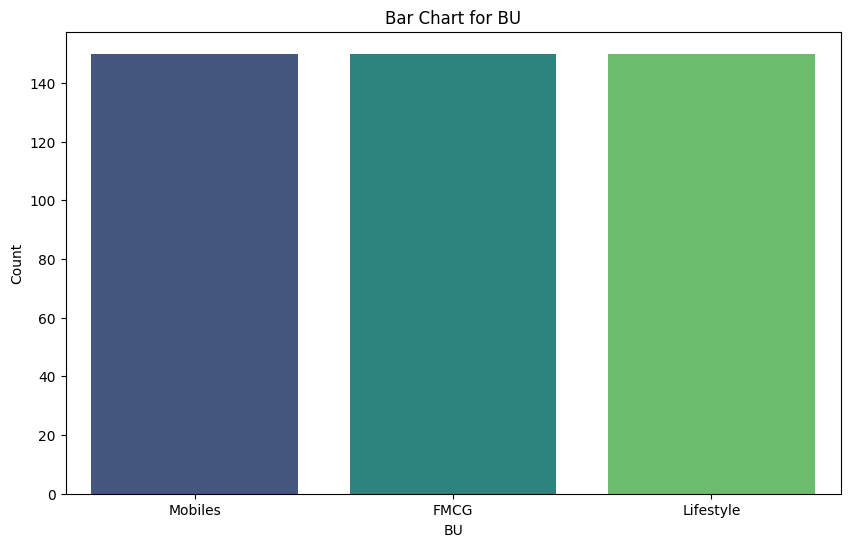

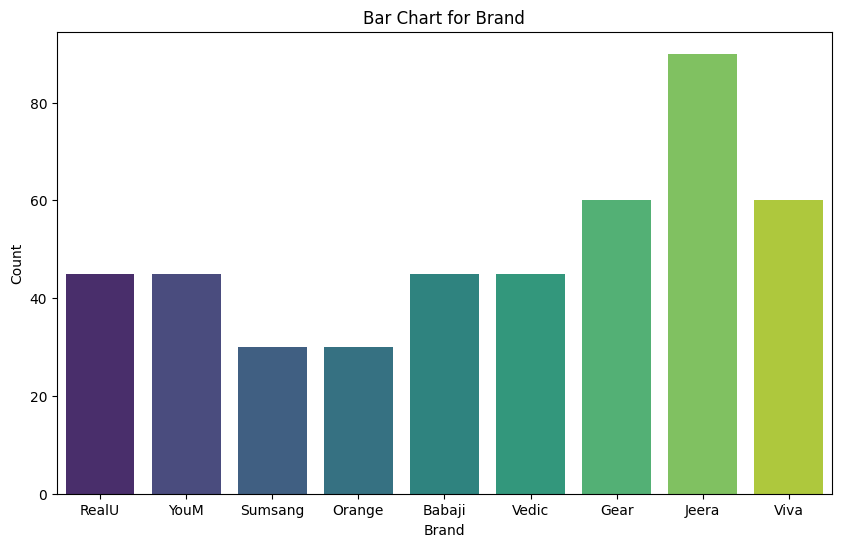

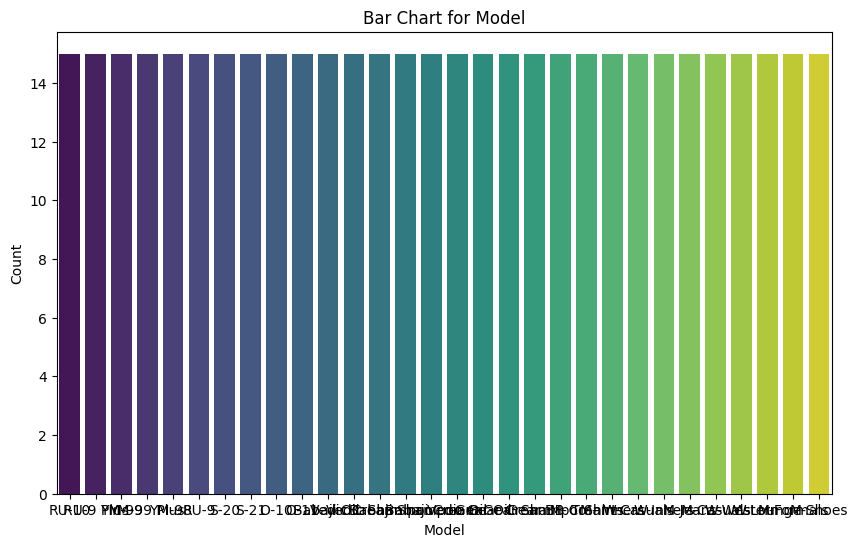

In [125]:
for col in cat_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(x=col, data=df,hue=col, palette="viridis")
    plt.title(f"Bar Chart for {col}")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.show()

key findings and insights obtained
1.bar chart for date represent equal sales is happened on every Date there is no variation in date sales it is balanced
2.days bar chart represents that the highest sales happens at thursday at the rate of 90 percent or more rest of days having equal sales
3.stock keeping unit distribution shows that stock gets updated continuesly as the changes commited it balancly commit the changes
4.al;l cith having equal sales shows in graphs
4.buisness units are also equally distributed
5.here sales model shows that model is equally distributed
6.here the sales of the brands shows variations  samsung and orange is equally distributed at the sales of 35 realu  youmand  babuji and vedic equally ditributed at the sales of 40 gear and viva equallyb distributed at the rate of 60 jeera is hghly distributed at the sales rate of 90 percents 